<a href="https://colab.research.google.com/github/Tanmayshukla20/ML/blob/main/21_Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('placement-2.csv')

In [ ]:
df.head()
df.shape

(200, 2)

Text(0, 0.5, 'Package(in lpa)')

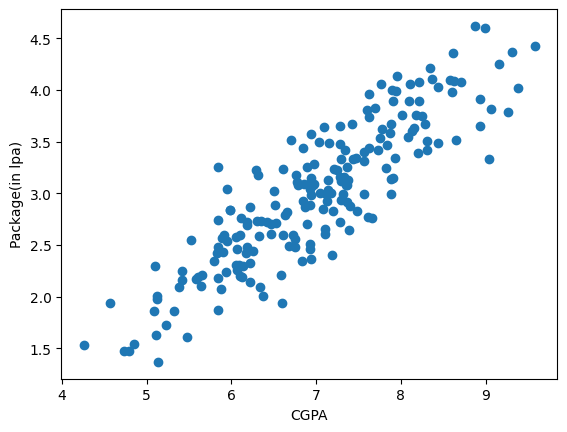

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)') #data is linear

In [ ]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [ ]:
y

,package
0,3.26
1,1.98
2,3.25
3,3.67
4,3.57
...,...
195,2.46
196,2.57
197,3.24
198,3.96


In [ ]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

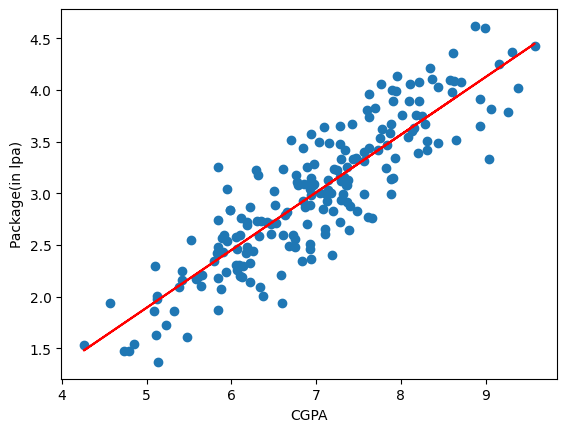

In [ ]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
y_pred = lr.predict(X_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [ ]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [ ]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 0.12129235313495527


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [ ]:
print("MSE",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred) #cgpa is explaing (covering )78% variance in LPA

MSE 0.780730147510384


In [ ]:
# Adjusted R2 score
X_test.shape

(40, 1)

In [ ]:
1 - ((1-r2)*(40-1)/(40-1-1))

0.7749598882343415

**Adding an irrelevant column to check r2 and adj r2_score**

---



In [ ]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.931612,3.26
1,5.12,0.678832,1.98
2,7.82,0.926517,3.25
3,7.42,0.361585,3.67
4,6.94,0.753692,3.57


Text(0, 0.5, 'Package(in lpa)')

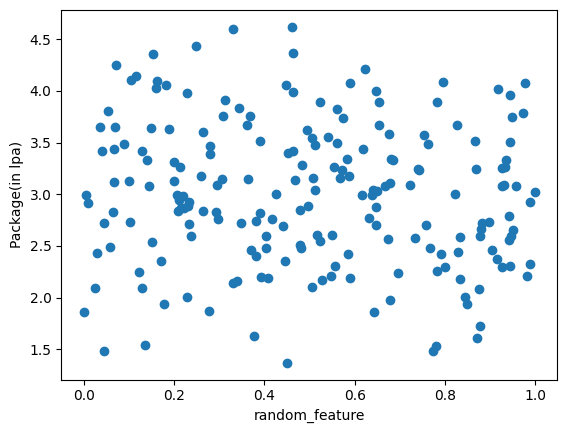

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [ ]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred) #it decreased

R2 score 0.7763110980015784


In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2)) #it also decreased

0.7642198060016637

****

**Adding a relevant column to check r2 and adj r2_score**

In [ ]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [ ]:
new_df2.sample(5)

,cgpa,iq,package
48,8.63,3.39,4.09
10,5.32,1.96,1.86
129,7.29,2.42,3.12
193,4.57,1.24,1.94
20,7.28,2.76,3.16


Text(0, 0.5, 'Package(in lpa)')

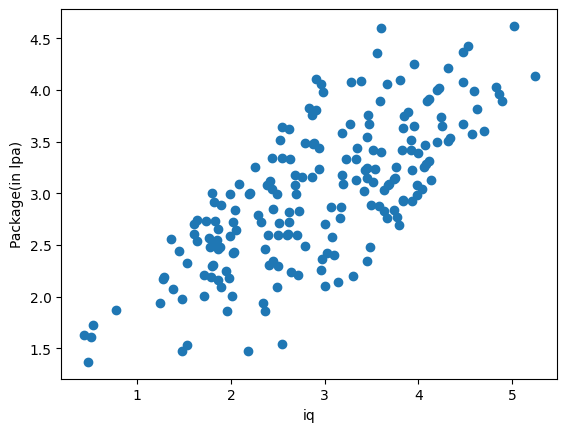

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [ ]:
np.random.randint(-100,100)

0

In [ ]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred) #r2 score increased

R2 score 0.8219699647831487


In [ ]:
1 - ((1-r2)*(40-1)/(40-1-2)) #adj r2 score also increased

0.8123467196362918